In [1]:
import numpy as np
import scipy as sp
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [3]:
piano_file = 'audio/piano.wav'
piano, sr = librosa.load(piano_file)
ipd.Audio(piano_file)

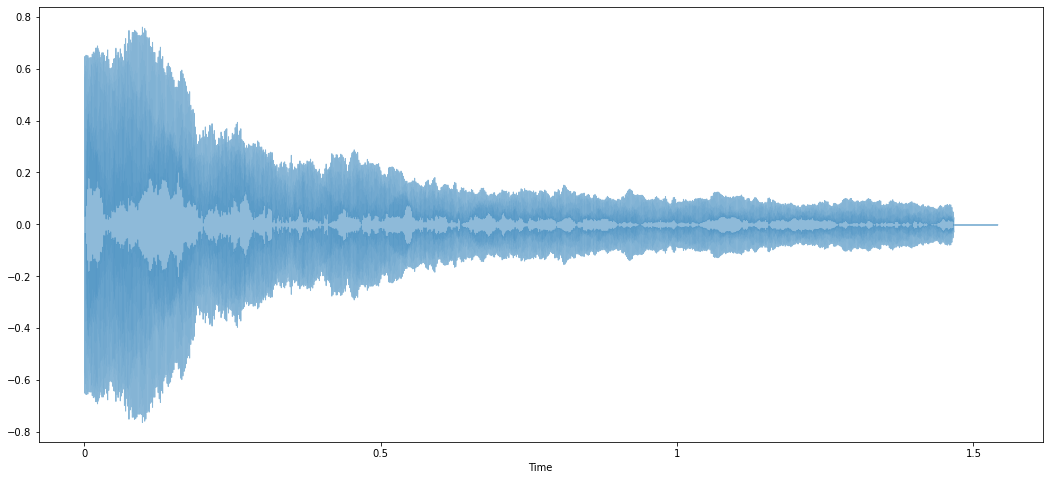

In [5]:
plt.figure(figsize=(18,8))
librosa.display.waveshow(piano, sr=sr, alpha=0.5)
plt.show()

In [6]:
ft = sp.fft.fft(piano)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

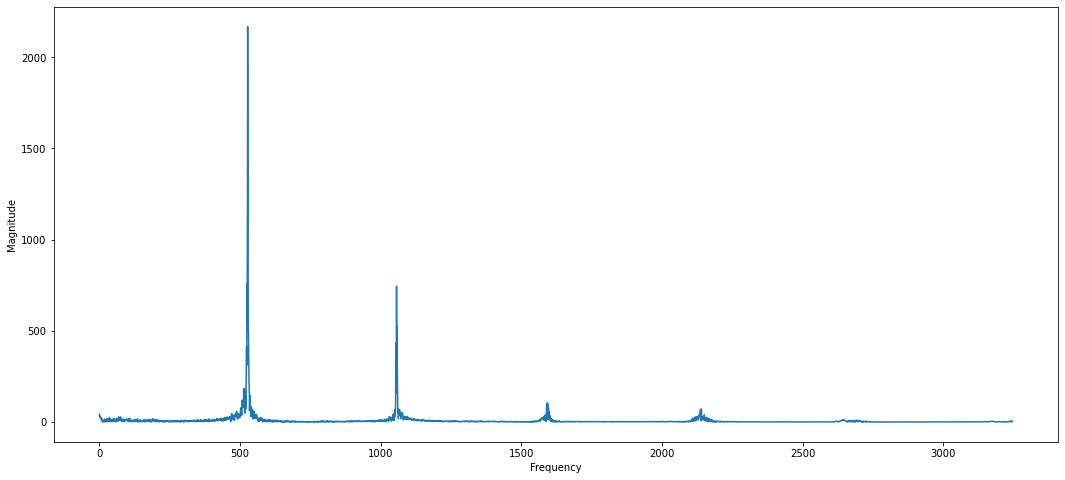

In [7]:
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [8]:
len(piano)

33968

In [9]:
d = 1/sr

In [10]:
d_523 = 1/523

In [11]:
d_400_samples = 400*d

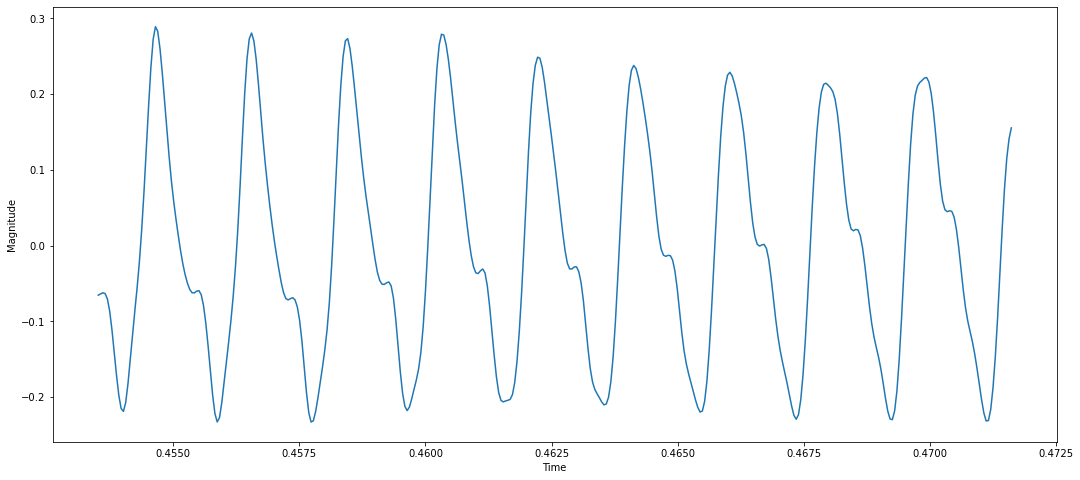

In [13]:
samples = range(len(piano))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], piano[10000:10400])
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()

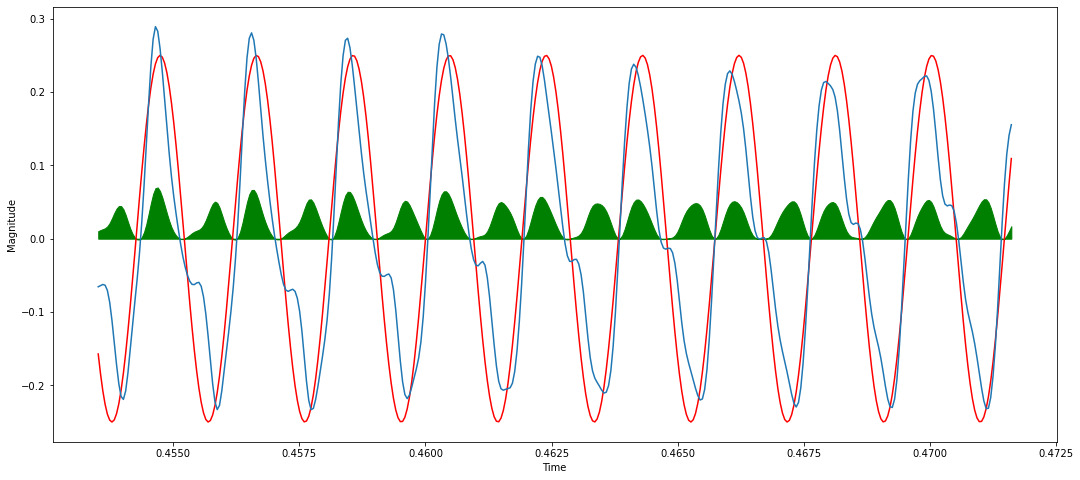

In [29]:
f = 523
phase = 0
phase2 = 0.58

sin = 0.25*np.sin(2*np.pi*(f*t-phase))
sin2 = 0.25*np.sin(2*np.pi*(f*t-phase2))

plt.figure(figsize=(18,8))
# plt.plot(t[10000:10400], sin[10000:10400])
plt.plot(t[10000:10400], sin2[10000:10400], color='r')
plt.plot(t[10000:10400], piano[10000:10400])

plt.fill_between(t[10000:10400], sin2[10000:10400]*piano[10000:10400], color='g')

plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.show()


In [30]:
import cmath

In [80]:
def create_signal(f, time):
    sig1 = np.sin(2*np.pi*(f*time))
    sig2 = np.sin(2*np.pi*(2*f*time))
    sig3 = np.sin(2*np.pi*(3*f*time))
    
    return sig1+sig2+sig3

In [33]:
def calculate_COG(mult_signal):
    x_center = np.mean([x.real for x in mult_signal])
    y_center = np.mean([x.imag for x in mult_signal])
    return x_center, y_center

In [34]:
def calculate_sum(mult_signal):
    x_sum = np.sum([x.real for x in mult_signal])
    y_sum = np.sum([x.imag for x in mult_signal])
    return x_sum, y_sum

In [35]:
def puretone(f, time):
    angle = -2*np.pi*f*time
    return np.cos(angle)+1j*np.sin(angle)

In [140]:
def plot_fourier_transform(puretone_freq,
                          signal_freq,
                          time,
                          plot_COG=False,
                          plot_sum=False):
    pure_tone = puretone(puretone_freq, time)
    signal = create_signal(signal_freq, time)
    
    mult_signal = pure_tone*signal
    
    X = [x.real for x in mult_signal]
    Y = [x.imag for x in mult_signal]
    
    plt.figure(figsize=(15,10))
    plt.plot(X,Y,'.',markersize=5)
    
    if plot_COG:
        COG = calculate_COG(mult_signal)
        plt.plot([COG[0]], [COG[1]], marker='o', markersize=10, color='r')
    
    if plot_sum:
        sum = calculate_sum(mult_signal)
        plt.plot([sum[0]], [sum[1]], marker='o', markersize=10, color='g')
    
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    
    if not plot_sum:
        plt.xlim((-3,3))
        plt.ylim((-3,3))
    
    plt.show()

In [135]:
def plot_signal(signal, time):
    plt.figure(figsize=(15,10))
    plt.plot(time, signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

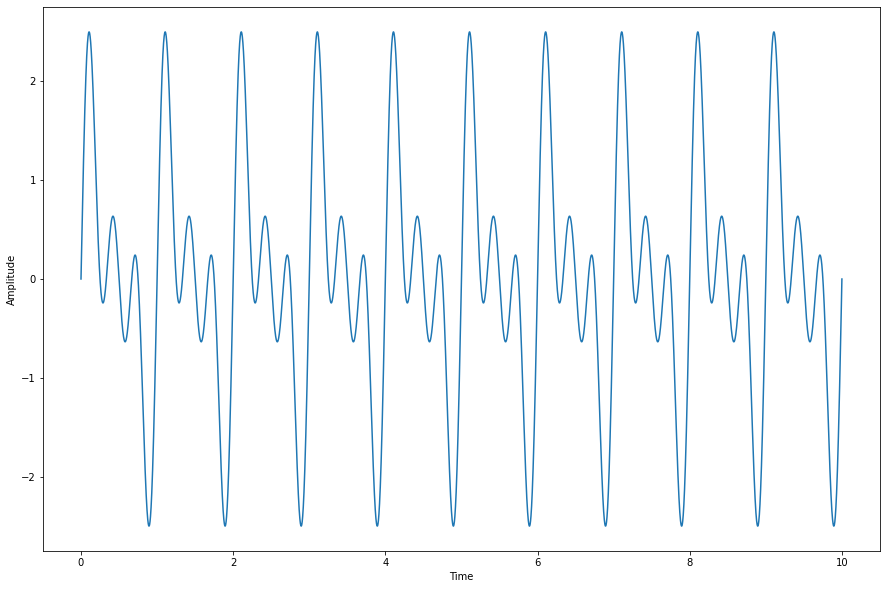

In [136]:
time = np.linspace(0, 10, 10000)
signal = create_signal(1, time)
plot_signal(signal, time)

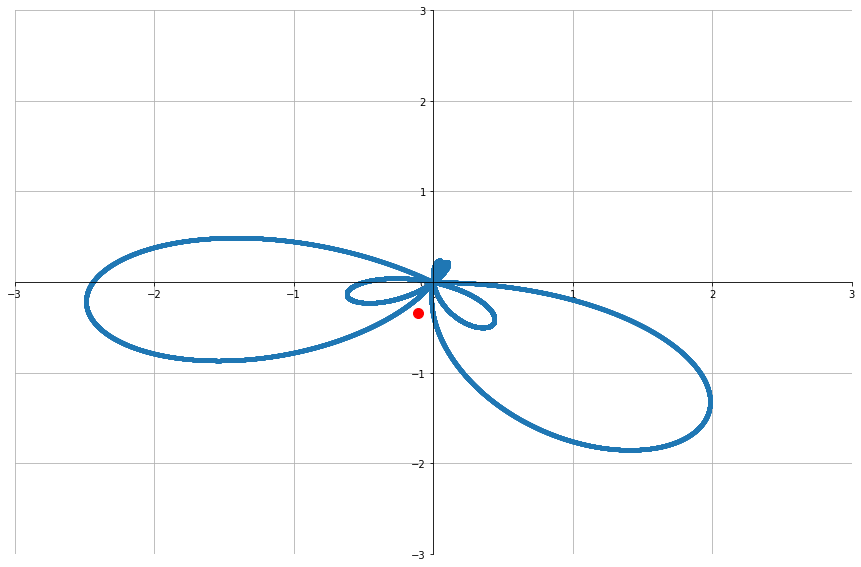

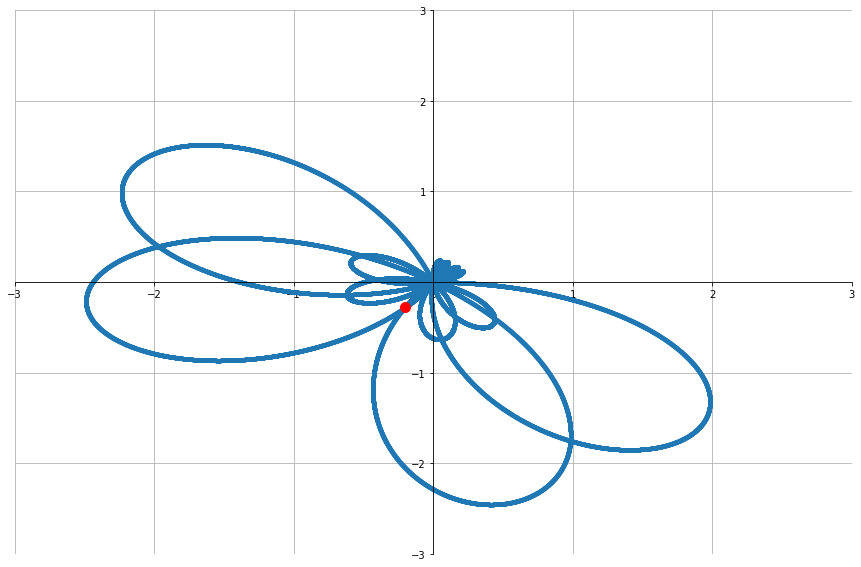

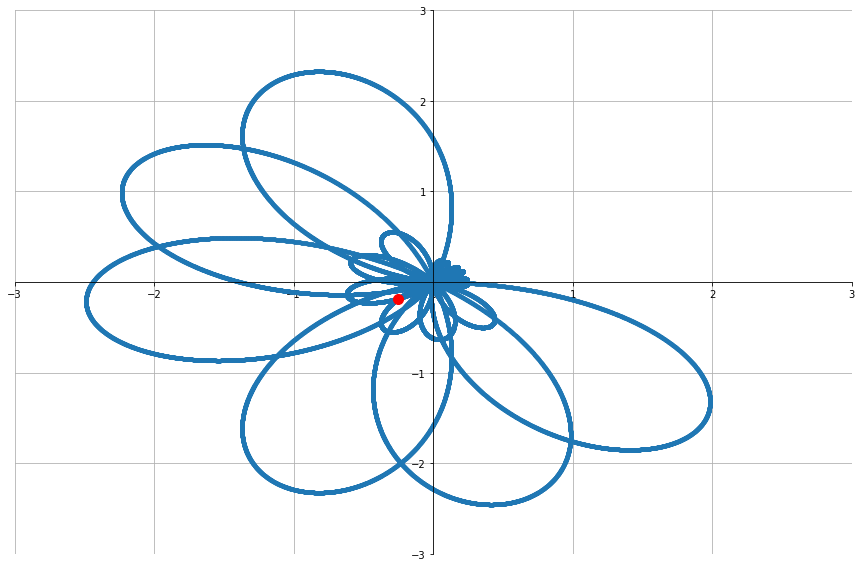

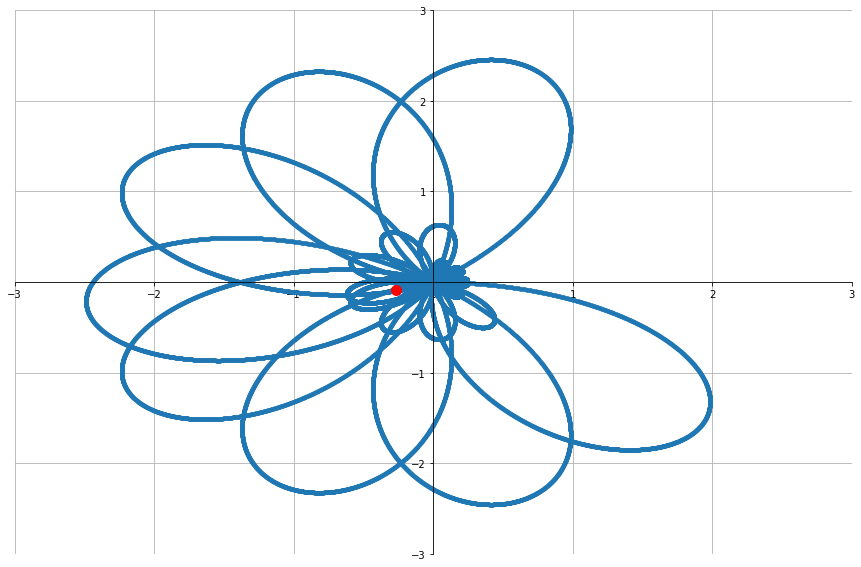

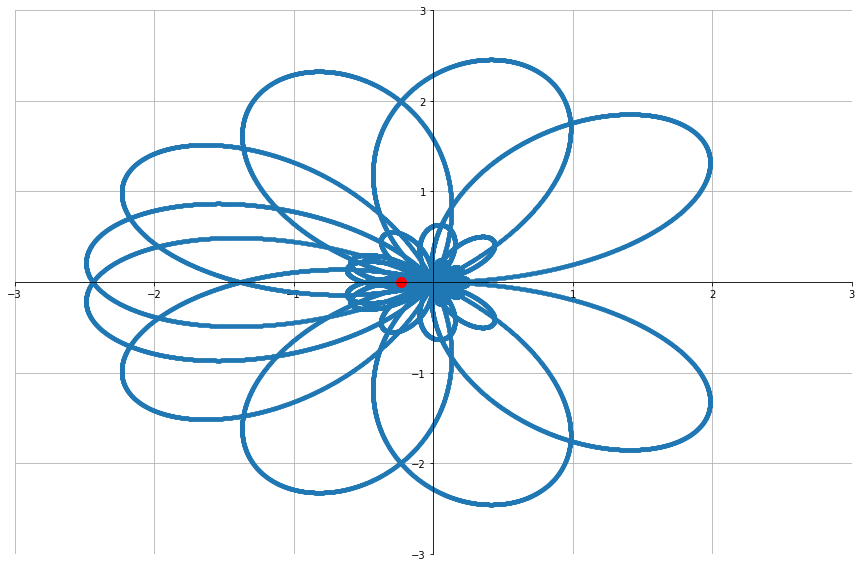

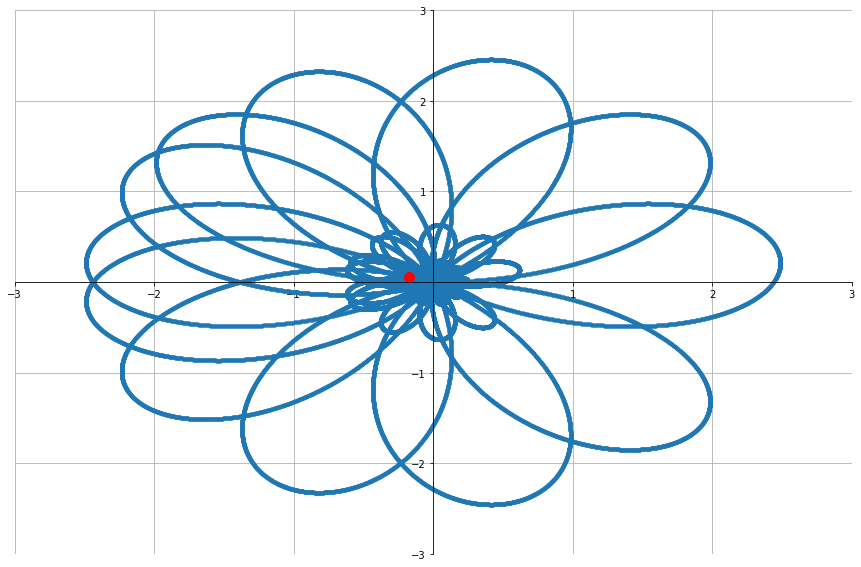

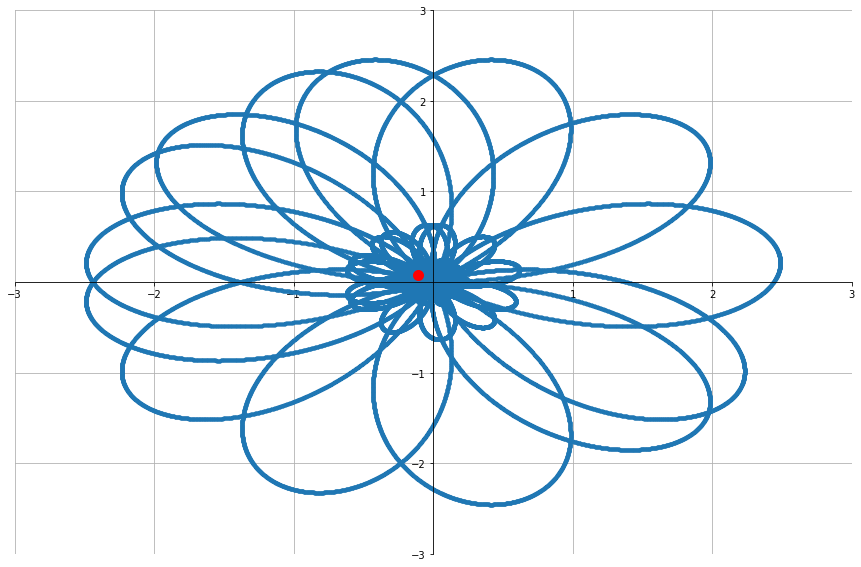

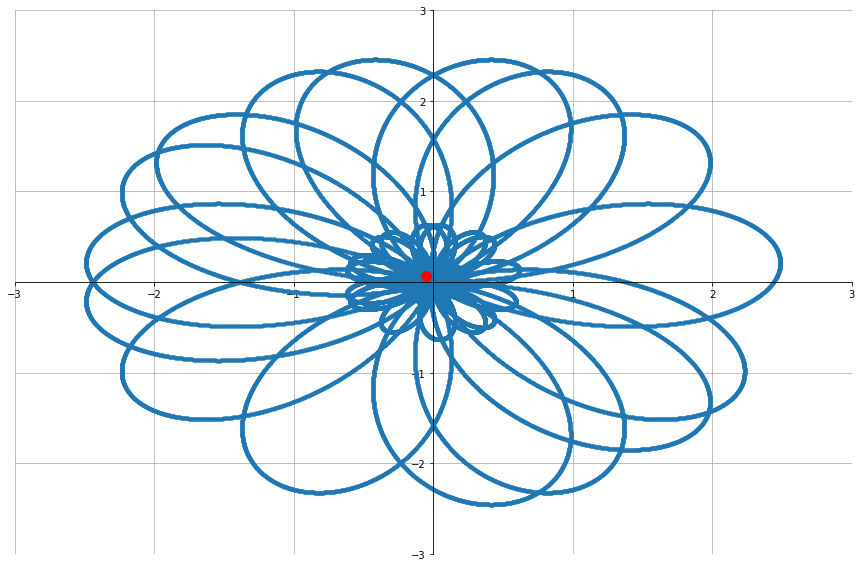

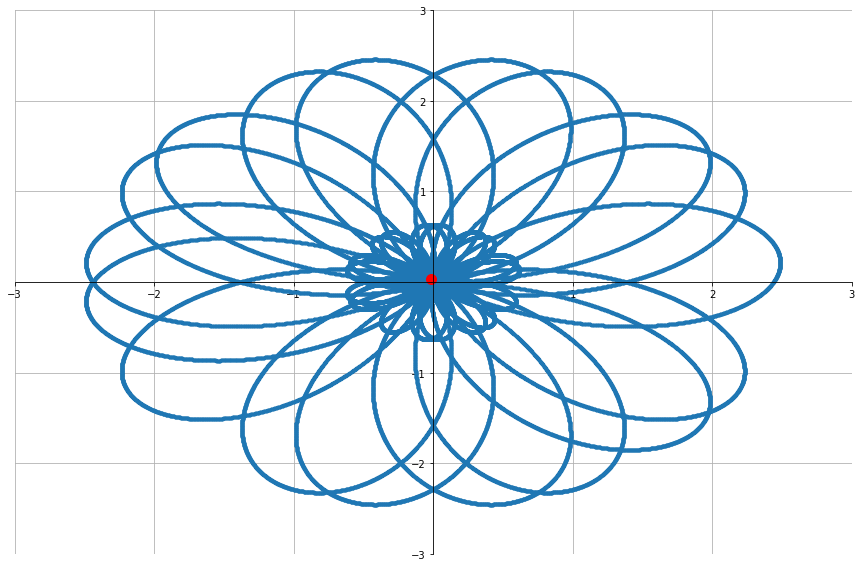

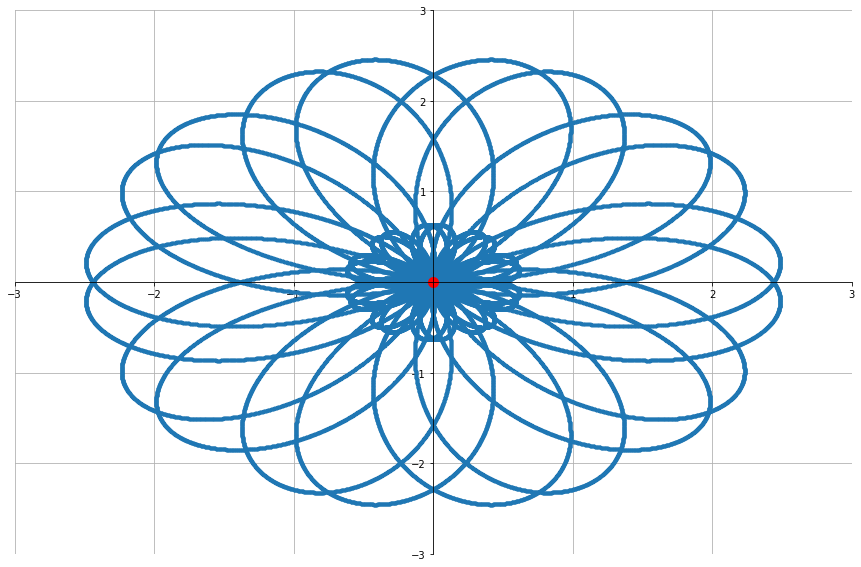

In [142]:
for i in range(1, 11):
    time = np.linspace(0, i, 100000)
    plot_fourier_transform(puretone_freq=1.1, signal_freq=1, time=time, plot_COG=True)

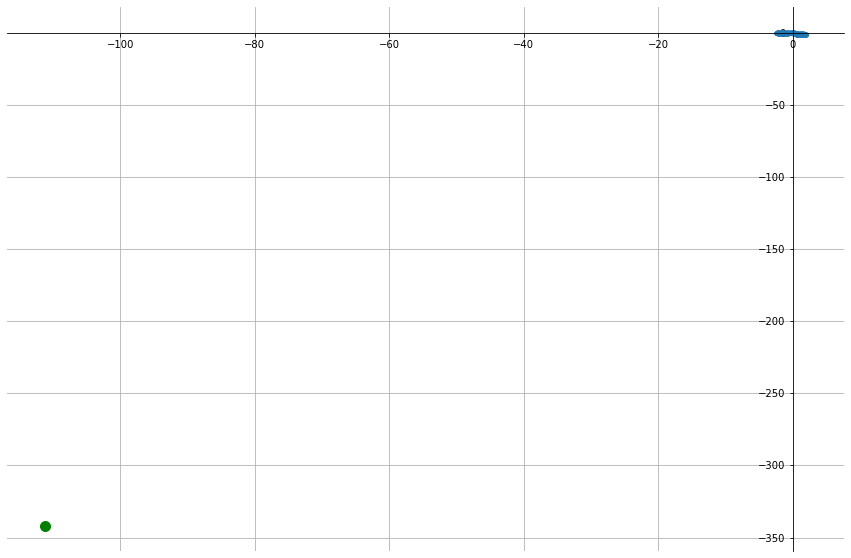

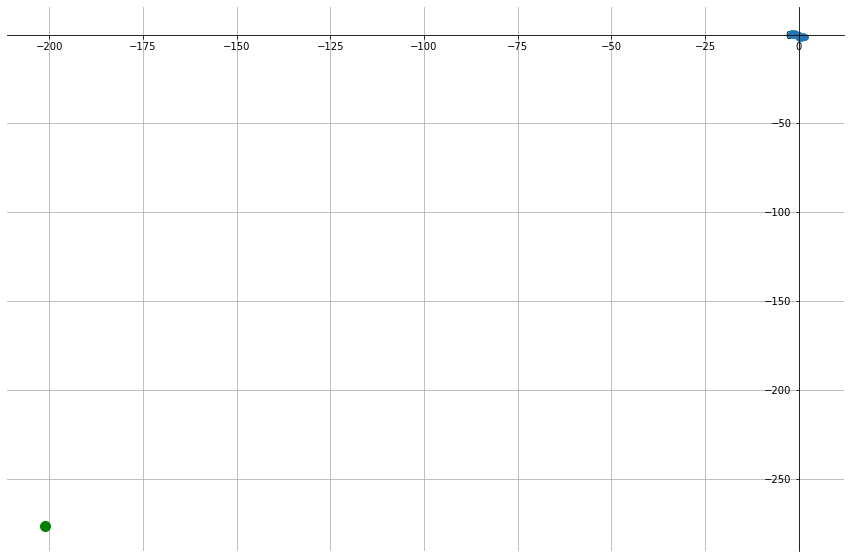

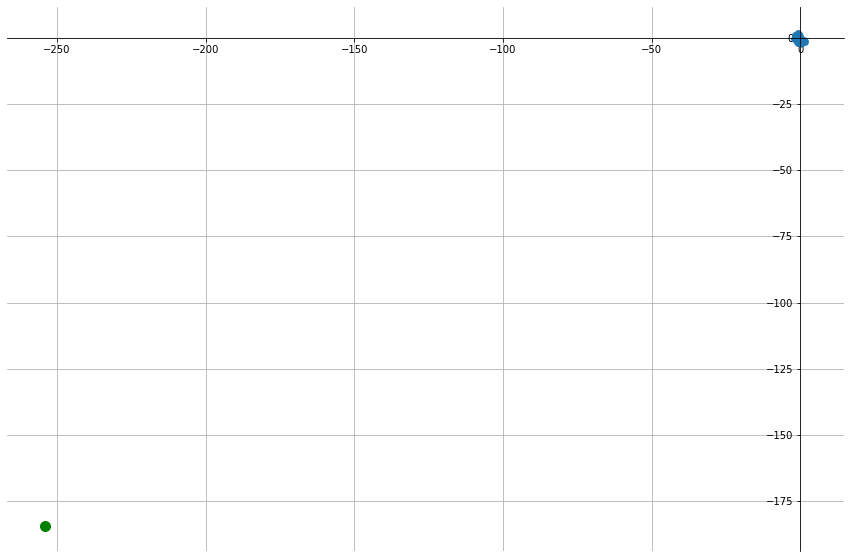

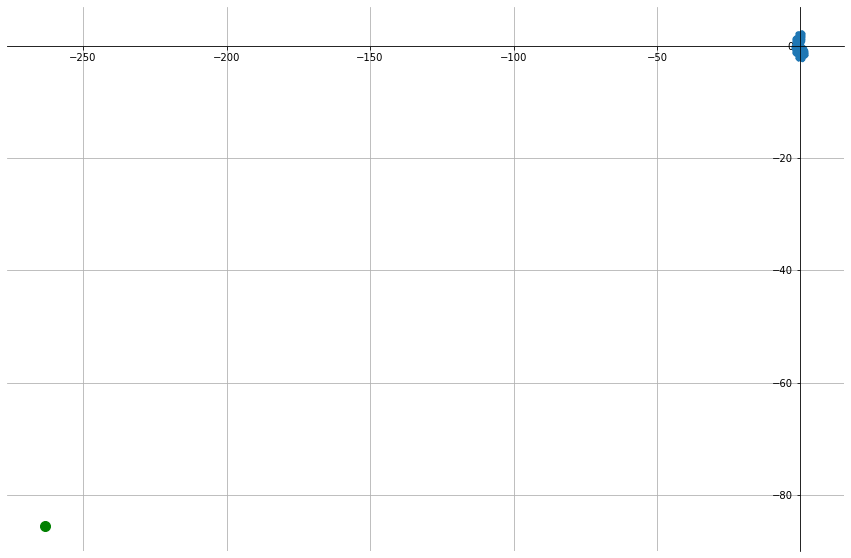

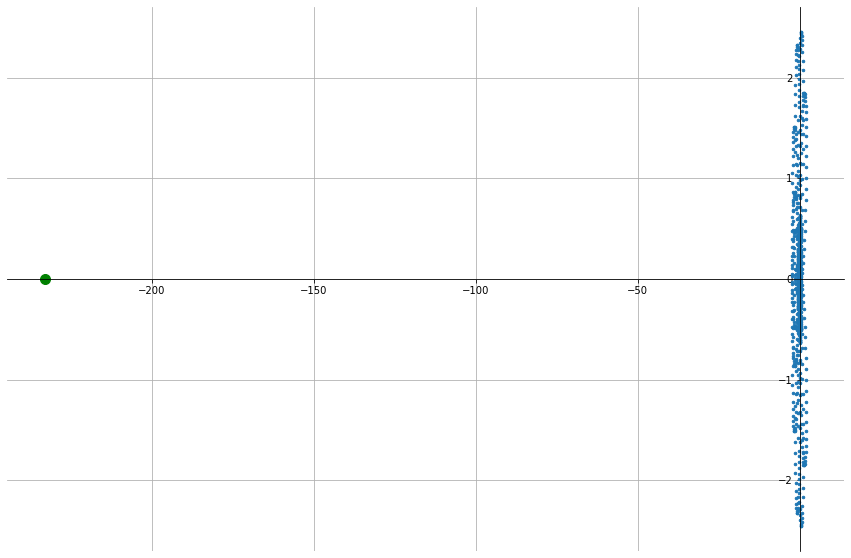

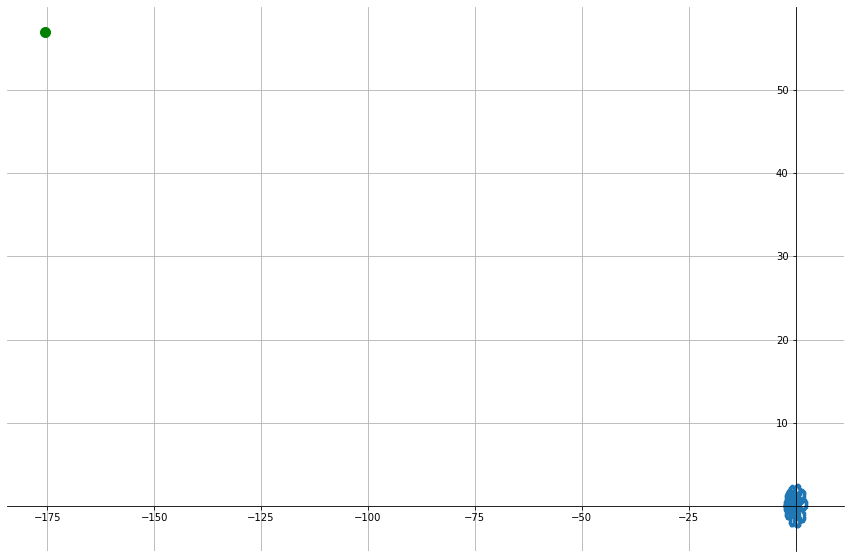

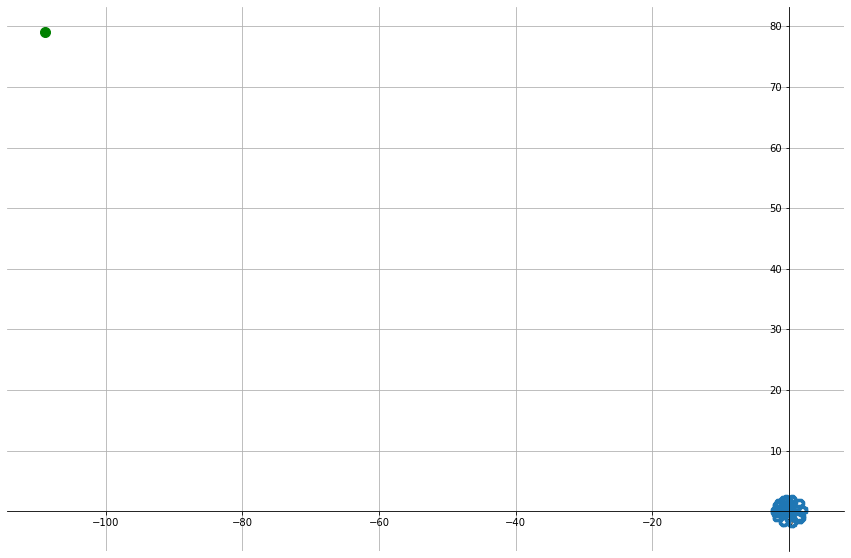

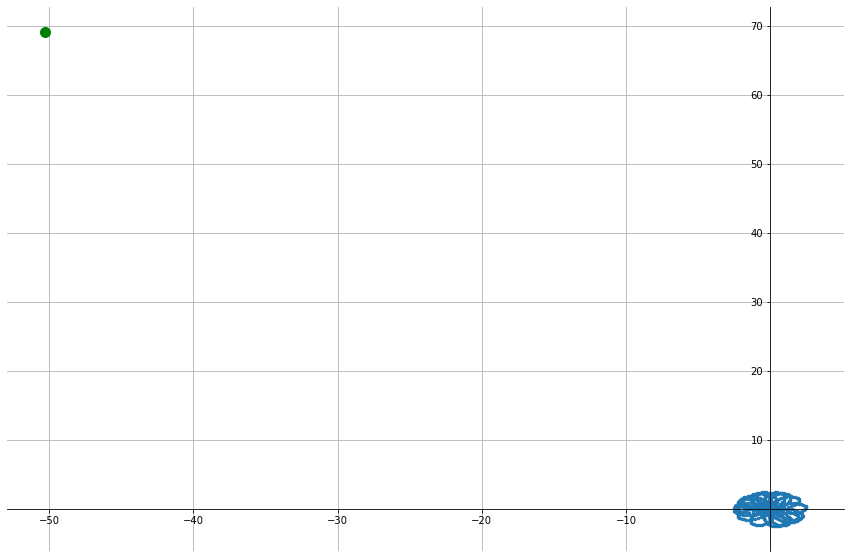

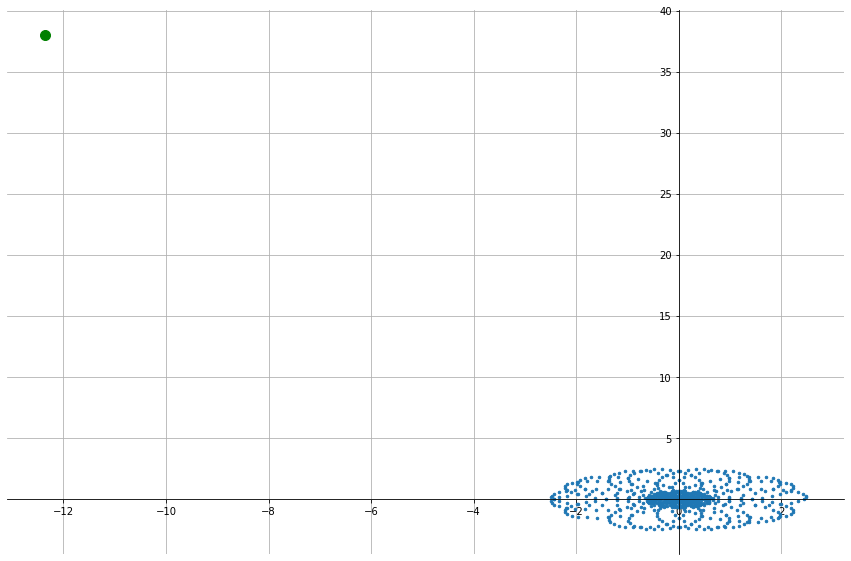

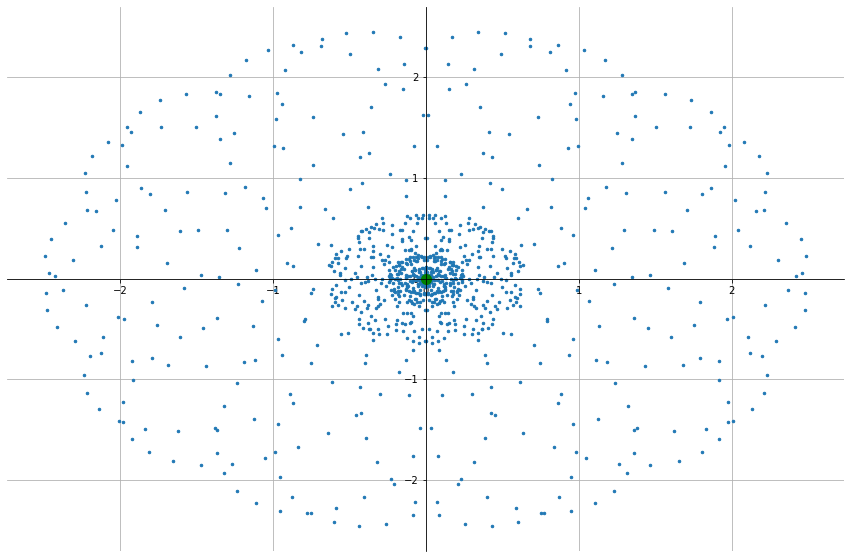

In [144]:
for i in range(1, 11):
    time = np.linspace(0, i, 1000)
    plot_fourier_transform(puretone_freq=1.1, signal_freq=1, time=time, plot_sum=True)